# 1. Setting things up

Let's take a look at `setup.py`, which we use to, well, set up stuff:

In [13]:
import setup as s
import imp
imp.reload(s)

<module 'setup' from '/home/manolo/Philosophy/Writings/Software/Signal/setup.py'>

Objects of the class `s.Strategies` tell the rest of the library what's the structure of the games that we will be dealing with. For example for games with 3 states, 3 signals and 3 acts:

In [4]:
strats = s.Strategies(3, 3, 3)

Now, in `strats` we have a bunch of data we will later need:

In [5]:
strats.senderstrategies
# all pure strats available to the sender; e.g. [2, 0, 1] means send signal 2 in state 0,
# signal 0 in state 1; signal 1 in state 2 (remember that in Python lists start at index 0)
# receiverstrategies does the same for the receiver

array([[0, 0, 0],
       [0, 0, 1],
       [0, 0, 2],
       [0, 1, 0],
       [0, 1, 1],
       [0, 1, 2],
       [0, 2, 0],
       [0, 2, 1],
       [0, 2, 2],
       [1, 0, 0],
       [1, 0, 1],
       [1, 0, 2],
       [1, 1, 0],
       [1, 1, 1],
       [1, 1, 2],
       [1, 2, 0],
       [1, 2, 1],
       [1, 2, 2],
       [2, 0, 0],
       [2, 0, 1],
       [2, 0, 2],
       [2, 1, 0],
       [2, 1, 1],
       [2, 1, 2],
       [2, 2, 0],
       [2, 2, 1],
       [2, 2, 2]])

In [6]:
strats.senderstrategiesprobs
# Same thing, given as explicit probability matrices. We don't use this at the moment;
# this is here in case we at some point want to include mixed-strategists in the population at some point.
# Note that the pure-strat probabilities are hardcoded at the moment.
# receiverstrategiesprobs does the same for the receiver

array([[[ 1.,  0.,  0.],
        [ 1.,  0.,  0.],
        [ 1.,  0.,  0.]],

       [[ 1.,  0.,  0.],
        [ 1.,  0.,  0.],
        [ 0.,  1.,  0.]],

       [[ 1.,  0.,  0.],
        [ 1.,  0.,  0.],
        [ 0.,  0.,  1.]],

       [[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 1.,  0.,  0.]],

       [[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  1.,  0.]],

       [[ 1.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  1.]],

       [[ 1.,  0.,  0.],
        [ 0.,  0.,  1.],
        [ 1.,  0.,  0.]],

       [[ 1.,  0.,  0.],
        [ 0.,  0.,  1.],
        [ 0.,  1.,  0.]],

       [[ 1.,  0.,  0.],
        [ 0.,  0.,  1.],
        [ 0.,  0.,  1.]],

       [[ 0.,  1.,  0.],
        [ 1.,  0.,  0.],
        [ 1.,  0.,  0.]],

       [[ 0.,  1.,  0.],
        [ 1.,  0.,  0.],
        [ 0.,  1.,  0.]],

       [[ 0.,  1.,  0.],
        [ 1.,  0.,  0.],
        [ 0.,  0.,  1.]],

       [[ 0.,  1.,  0.],
        [ 0.,  1.,  0.],
        [ 1.,  0.,  0.]],


In [8]:
strats.lss # This gives the number of pure sender strats; lrs is the same for the receiver

27

In [10]:
strats.random_sender()
# This gives a random sender population structure.
# It samples from the flat Dirichlet distribution over the (strats.lss - 1) simplex
# random_receiver() does what one expects from it.

array([ 0.0533,  0.0386,  0.0881,  0.0688,  0.0292,  0.0022,  0.0627,
        0.0106,  0.0194,  0.0155,  0.1007,  0.0068,  0.1404,  0.0324,
        0.0211,  0.0352,  0.0362,  0.0278,  0.0186,  0.0198,  0.0123,
        0.0042,  0.0028,  0.0039,  0.0919,  0.0099,  0.0475])

State chances, so far, are also hardcoded to equiprobability:

In [20]:
strats.chances

array([ 0.3333,  0.3333,  0.3333])

`s.Payoff_Functions` creates functions that calculate average payoffs, which we then need to run replicator dynamics, for example.

In [14]:
weagree = s.np.array([1,1,2,2,3,3,2,2,3,3,1,1,3,3,1,1,2,2])
# I'm using s.np to access NumPy, which setup.py imports

`weagree` corresponds to the following payoff matrix

|      || S1     | S2   | S3  |
|---------------------- -------
|A1    || 1,1    | 2,2 | 3,3  |
|A2    || 2,2    | 3,3 | 1,1  |
|A3    || 3,3    | 1,1 | 2,2  |

This way of entering payoff matrices is taylor-made for the 3x3x3 case, and it's not very flexible, or readable. At some point we'll need to provide a better way. The obvious choice is something like

    weagree_better = np.array([[(1,1), (2,2), (3,3)],
                               [(2,2), (3,3), (1,1)],
                               [(3,3), (1,1), (2,2)]])


# 2. Common Interest

We can now calculate our common interest measures:


In [70]:
import commoninterest as cihttp://localhost:8888/notebooks/Signal%20Tutorial.ipynb#3.-Static-Analysis
weagree_static = ci.Game(weagree)

In [73]:
C = weagree_static.kendalldistance
Cstar = weagree_static.cistar
Ksender = weagree_static.kendallsender
Kreceiver = weagree_static.kendallreceiver
Kstar_sender = weagree_static.starsender
Kstar_receiver = weagree_static.starreceiver

C, Cstar, Ksender, Kreceiver, Kstar_sender, Kstar_receiver

(0.0, 0.0, 2.0, 2.0, 3.0, 3.0)

The parameter one can see in the introduction of `cistar`, that `(0)` . is the value of a tie. Peter and I tried different values for ties, 0, 0.5, 1, etc.

With `weagree_static` we can also interface with [gambit](http://www.gambit-project.org/) to calculate Nash equilibria. You need to have gambit installed for the following to run.

# 3. Static Analysis

In [77]:
eqbs = weagree_static.just_equilibria()

eqbs

['NE,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000',
 'NE,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000',
 'NE,1.000,0.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,0.000,0.000,1.000,1.000,0.000,0.000,0.000,1.000,0.000',
 'NE,1.000,0.000,0.000,0.000,0.000,1.000,0.000,0.500,0.500,0.000,0.000,1.000,1.000,0.000,0.000,1.000,0.000,0.000',
 'NE,0.750,0.250,0.000,0.000,0.000,1.000,0.000,0.500,0.500,0.000,0.000,1.000,0.000,0.000,1.000,0.500,0.500,0.000',
 'NE,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.500,0.500,0.000,0.000,1.000,0.000,0.000,1.000,0.500,0.500,0.000',
 'NE,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,1.000,0.000,0.000',
 'NE,0.000,1.000,0.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.500,0.500,0.000,0.000,1.000,1.000,0.000,0.000',
 'NE,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.000,0.000,1.000,0.0

Refer to gambit for how to read these results. We can now calculate the mutual info between sender and receiver in these results:

In [78]:
weagree_static.calculate_info_content(eqbs)

([0.0,
  0.0,
  1.5849625007211559,
  1.125814583693911,
  0.8962406251802889,
  0.6666666666666666,
  0.9182958340544893,
  0.9182958340544893,
  0.0,
  0.0,
  0.9182958340544893,
  1.1258145836939113,
  1.5849625007211559,
  1.1258145836939113,
  0.896240625180289,
  0.9182958340544893,
  0.0,
  0.0,
  0.6666666666666666,
  0.9182958340544893,
  0.0,
  0.0,
  0.9182958340544893,
  1.1258145836939113,
  1.5849625007211559,
  0.9182958340544893,
  0.6666666666666666,
  0.9182958340544893,
  0.0,
  0.0,
  0.896240625180289,
  0.6670003607339176,
  0.6666666666666666,
  0.9182958340544893,
  0.896240625180289,
  1.1258145836939113,
  1.5849625007211559,
  0.9182958340544893,
  0.6666666666666666,
  0.0,
  0.6666666666666666,
  0.6670003607339174,
  0.0,
  0.6666666666666666,
  0.8962406251802889,
  0.6666666666666666,
  0.0,
  0.6670003607339174,
  0.6666666666666666,
  0.9182958340544893,
  0.9182958340544893,
  1.125814583693911,
  0.896240625180289,
  0.6670003607339176,
  0.666666666

Unsurprisingly, we have a lot of 1.58... values. That's $\log_2 3$, the mutual info for a signaling system in these games.

Let's turn now to the dynamic analysis:

# 4. Dynamic Analysis

In [15]:
weagree_pf = s.Payoffs_Functions(weagree, strats)

`weagree_pf` gives us a couple of functions. `avgpayoff(a, b)` calculates the average payoff for a sender following the strategy `strats.senderstrategies[a]` and a receiver following `strats.receiverstrategies[b]`:

In [27]:
weagree_pf.avgpayoff(1, 2)

array([ 2.,  2.])

In [28]:
strats.senderstrategies[1], strats.receiverstrategies[2]

(array([0, 0, 1]), array([0, 0, 2]))

Check that this is correct, and try other values.

Now, `s.Game` generates a game that can be fed to a ODE solver:

In [29]:
weagree_game = s.Game(weagree_pf.avgpayoff, strats)

`weagree_game` is where the action is, really. the various functions it provides calculate the RHS for the equations in the system that ODE solvers will solve, and does so with fast NumPy linear algebra. We can now solve this game for a random population structure, to see how it works. We first `import calculations.py`, which is the module that solves ODEs.

In [32]:
import calculations as c

In [33]:
sender_init = strats.random_sender()
receiver_init = strats.random_receiver()

In [40]:
evol = c.one_run_odeint(weagree_game, sender_init, receiver_init)

the evolution calculated in `evol` is convergent (the propotion of a certain sender strat and receiver strat quickly grows to 1):

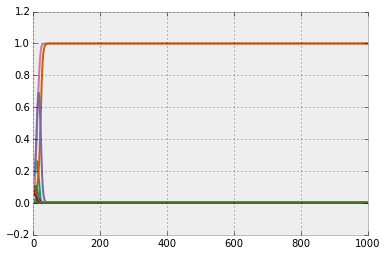

In [43]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(evol)
plt.show()

Let's see what the final population is doing:

In [53]:
sender_final, receiver_final = s.np.split(evol[-1], 2)

In [58]:
strats.senderstrategies[sender_final.argmax()], strats.receiverstrategies[receiver_final.argmax()]
# This gives the strategies with the highest frequency (which we know is 1)
# for sender and receiver in the final population state

(array([1, 2, 0]), array([0, 2, 1]))

Check that this combination of sender and receiver strategies takes them to the highest payoff for every state, as expected. We can also check directly the mutual info between senders and receivers in the final snapshot:

In [81]:
info = s.Information(strats, s.np.concatenate((sender_final, receiver_final)))
info.mutual_info_states_acts()

1.5849625007211541

A signaling system, as expected.

In this exercise, we have used `scipy.odeint`. `calculations` can also calculate evolutions according to the discrete-time replicator dynamics:

In [60]:
evol_discrete = c.one_run_discrete(weagree_game, sender_init, receiver_init)

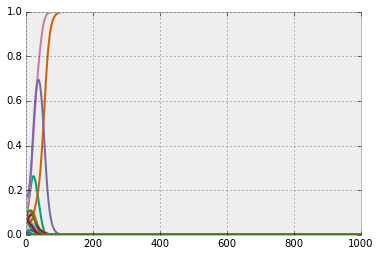

In [61]:
plt.plot(evol_discrete)
plt.show()

In [62]:
sender_final_disc, receiver_final_disc = s.np.split(evol_discrete[-1], 2)

In [63]:
strats.senderstrategies[sender_final_disc.argmax()], strats.receiverstrategies[receiver_final_disc.argmax()]

(array([1, 2, 0]), array([0, 2, 1]))

`calculations` also provides access to the more flexible scipy.integrate.ode family of solvers.